# Compact Data

In [85]:
import pandas as pd
fileNames = ['Dataset2/Compact.csv', 'Dataset2/Skewed.csv', 'Dataset2/Subclusters.csv', 'Dataset2/wellSeperated.csv']
data = pd.read_csv(fileNames[0])

In [86]:
for index, row in data.iterrows():
    try:
        data.loc[index] = row.astype('float')
    except ValueError as e:
        print(e)
        data = data.drop(index, axis=0)

data = data.reset_index(drop=True)

In [87]:
data = data.fillna(data.mean())


/home/karthikprasanna/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


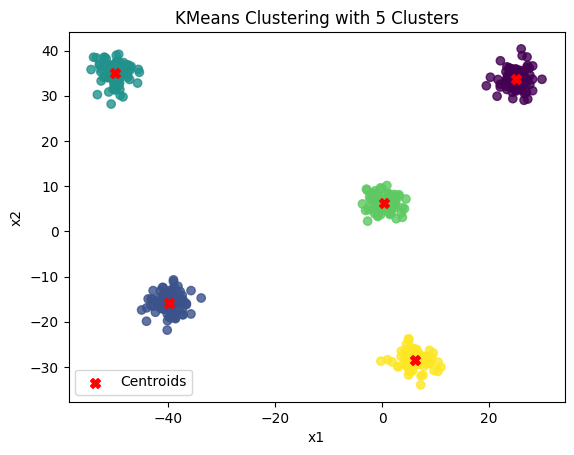

In [88]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Specify the number of clusters
num_clusters = 5

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['x1', 'x2']])
silhouette_kmeans = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=50, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'KMeans Clustering with {num_clusters} Clusters')
plt.legend()
plt.show()

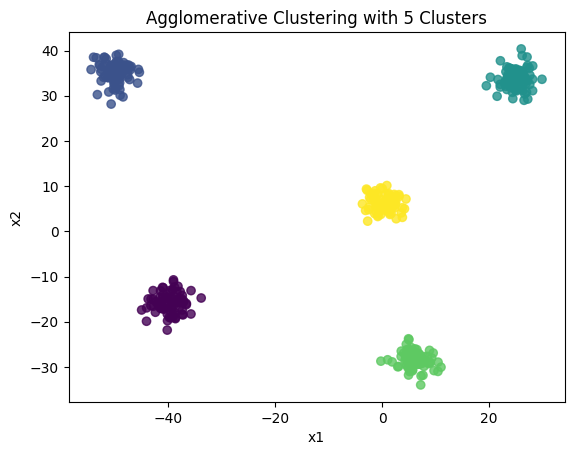

In [89]:
from sklearn.cluster import AgglomerativeClustering

# Specify the number of clusters
num_clusters = 5

# Fit AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
data['cluster'] = agg_clustering.fit_predict(data[['x1', 'x2']])
silhouette_agg = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
plt.show()

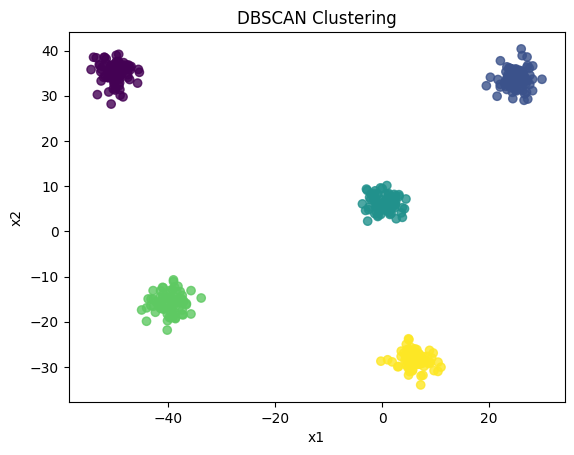

In [90]:
from sklearn.cluster import DBSCAN

# Specify the parameters for DBSCAN
eps_value = 10  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples_value = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data['cluster'] = dbscan.fit_predict(data[['x1', 'x2']])
silhouette_dbscan = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('DBSCAN Clustering')
plt.show()

In [91]:
# Table of Silhouette Scores
silhouette_scores = pd.DataFrame({'KMeans': [silhouette_kmeans], 'Agglomerative': [silhouette_agg], 'DBSCAN': [silhouette_dbscan]})
silhouette_scores.index = ['Silhouette Score']
silhouette_scores


,KMeans,Agglomerative,DBSCAN
Silhouette Score,0.91178,0.91178,0.91178


# Skewed Data

In [92]:
data = pd.read_csv(fileNames[1])

for index, row in data.iterrows():
    try:
        data.loc[index] = row.astype('float')
    except ValueError as e:
        print(e)
        data = data.drop(index, axis=0)

data = data.reset_index(drop=True)

data = data.fillna(data.mean())


/home/karthikprasanna/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


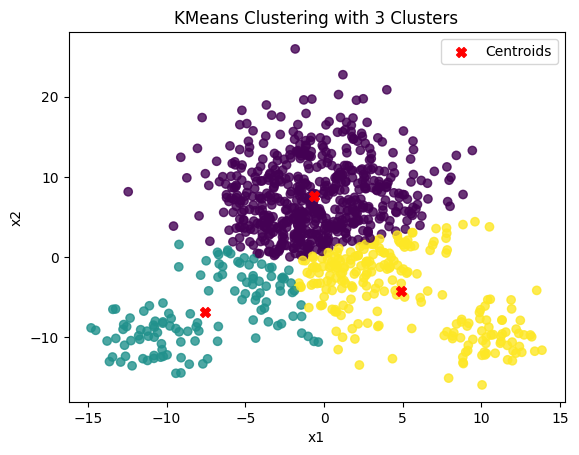

In [93]:
# Specify the number of clusters
num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['x1', 'x2']])
silhouette_kmeans = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=50, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'KMeans Clustering with {num_clusters} Clusters')
plt.legend()
plt.show()

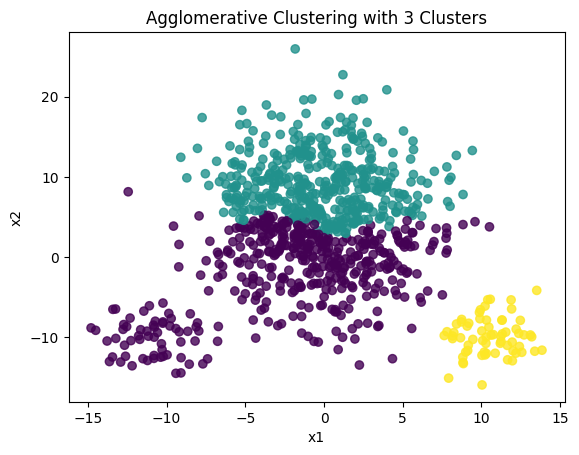

In [94]:
from sklearn.cluster import AgglomerativeClustering

# Specify the number of clusters
num_clusters = 3

# Fit AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
data['cluster'] = agg_clustering.fit_predict(data[['x1', 'x2']])
silhouette_agg = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
plt.show()

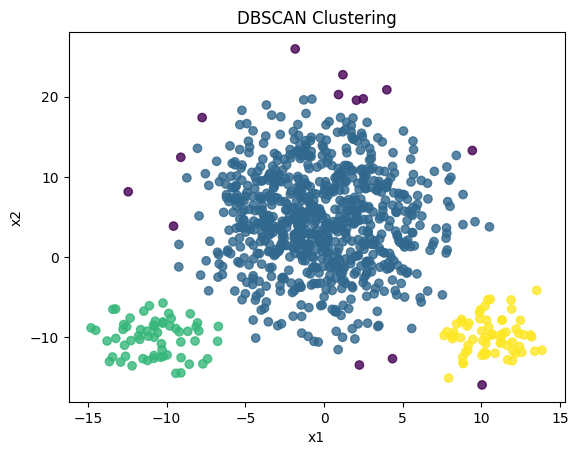

In [95]:
eps_value = 2.2  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples_value = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data['cluster'] = dbscan.fit_predict(data[['x1', 'x2']])
# silhouette_dbscan = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('DBSCAN Clustering')
plt.show()

In [96]:
# Table of Silhouette Scores
silhouette_scores = pd.DataFrame({'KMeans': [silhouette_kmeans], 'Agglomerative': [silhouette_agg], 'DBSCAN': [silhouette_dbscan]})
silhouette_scores.index = ['Silhouette Score']
silhouette_scores

,KMeans,Agglomerative,DBSCAN
Silhouette Score,0.430766,0.37208,0.91178


# Subclusters Data

In [97]:
data = pd.read_csv(fileNames[2])

for index, row in data.iterrows():
    try:
        data.loc[index] = row.astype('float')
    except ValueError as e:
        print(e)
        data = data.drop(index, axis=0)

data = data.reset_index(drop=True)

data = data.fillna(data.mean())

/home/karthikprasanna/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


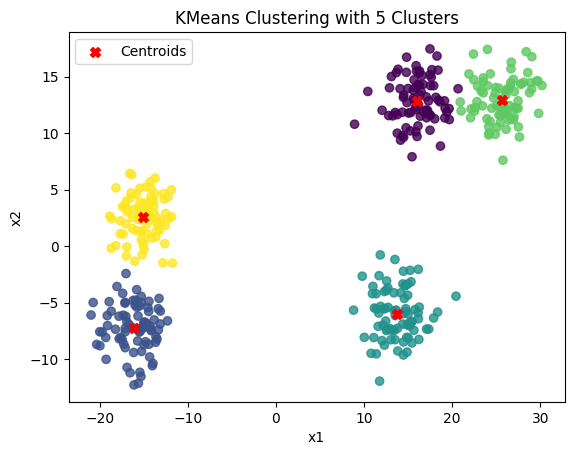

In [98]:
# Specify the number of clusters
num_clusters = 5

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['x1', 'x2']])
silhouette_kmeans = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=50, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'KMeans Clustering with {num_clusters} Clusters')
plt.legend()
plt.show()

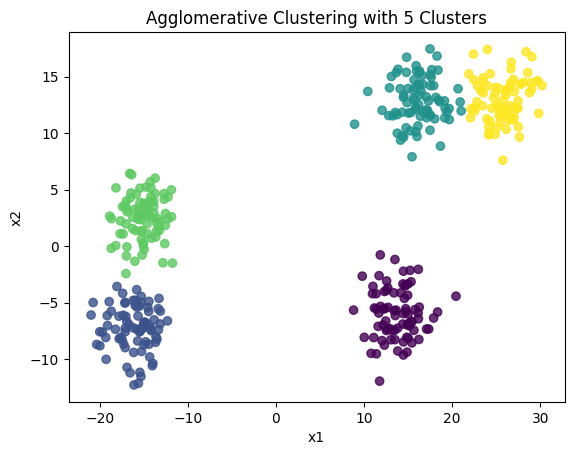

In [99]:
from sklearn.cluster import AgglomerativeClustering

# Specify the number of clusters
num_clusters = 5

# Fit AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
data['cluster'] = agg_clustering.fit_predict(data[['x1', 'x2']])
silhouette_agg = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
plt.show()

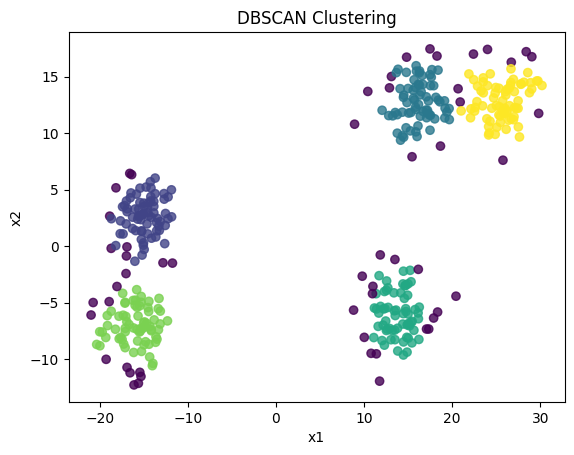

In [117]:
eps_value = 1.2  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples_value = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data['cluster'] = dbscan.fit_predict(data[['x1', 'x2']])
# silhouette_dbscan = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('DBSCAN Clustering')
plt.show()

In [118]:
# Table of Silhouette Scores
silhouette_scores = pd.DataFrame({'KMeans': [silhouette_kmeans], 'Agglomerative': [silhouette_agg], 'DBSCAN': [silhouette_dbscan]})
silhouette_scores.index = ['Silhouette Score']
silhouette_scores

,KMeans,Agglomerative,DBSCAN
Silhouette Score,0.668831,0.668312,0.91178


# Well Seperated Data

In [119]:
data = pd.read_csv(fileNames[3])

for index, row in data.iterrows():
    try:
        data.loc[index] = row.astype('float')
    except ValueError as e:
        print(e)
        data = data.drop(index, axis=0)

data = data.reset_index(drop=True)

data = data.fillna(data.mean())

/home/karthikprasanna/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


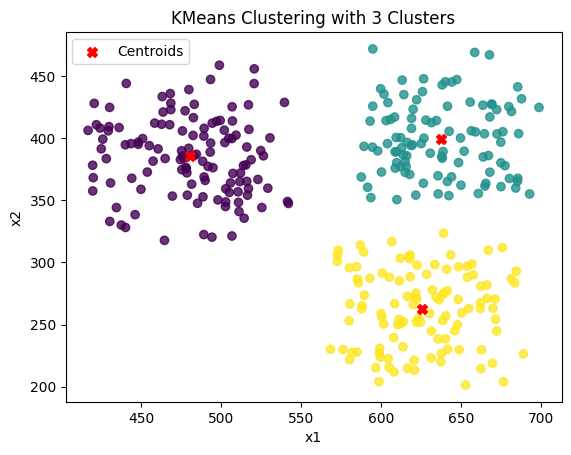

In [121]:
# Specify the number of clusters
num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['x1', 'x2']])
silhouette_kmeans = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=50, label='Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'KMeans Clustering with {num_clusters} Clusters')
plt.legend()
plt.show()

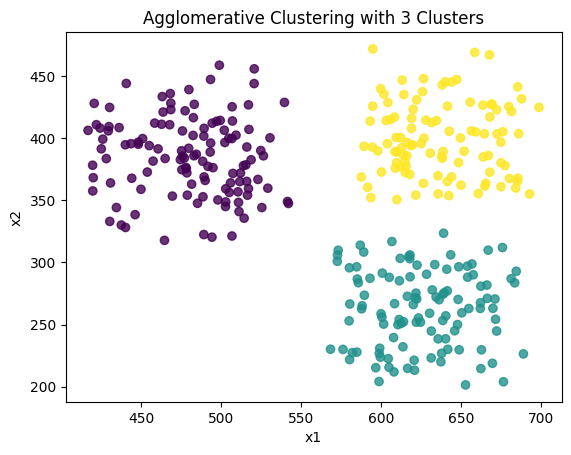

In [123]:
from sklearn.cluster import AgglomerativeClustering

# Specify the number of clusters
num_clusters = 3

# Fit AgglomerativeClustering model
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
data['cluster'] = agg_clustering.fit_predict(data[['x1', 'x2']])
silhouette_agg = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
plt.show()

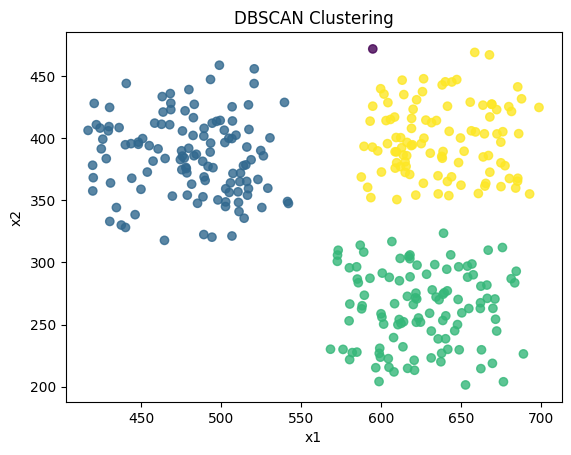

In [155]:
eps_value = 30  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples_value = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Fit DBSCAN model
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
data['cluster'] = dbscan.fit_predict(data[['x1', 'x2']])
# silhouette_dbscan = silhouette_score(data[['x1', 'x2']], data['cluster'])

# Plot the clusters
plt.scatter(data['x1'], data['x2'], c=data['cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('DBSCAN Clustering')
plt.show()

In [156]:
# Table of Silhouette Scores
silhouette_scores = pd.DataFrame({'KMeans': [silhouette_kmeans], 'Agglomerative': [silhouette_agg], 'DBSCAN': [silhouette_dbscan]})
silhouette_scores.index = ['Silhouette Score']
silhouette_scores

,KMeans,Agglomerative,DBSCAN
Silhouette Score,0.613946,0.613946,0.91178
